In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
excel = pd.read_excel('CSV\estadisticas2025paralumnos.xlsx', sheet_name=[0,1])
stats = excel[0]
cupos = excel[1]

In [ ]:
# Visualización de los tipos de variables, tamaño y cantidad de nulos
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_materia    392 non-null    int64 
 1   materia        392 non-null    object
 2   comision       392 non-null    object
 3   total_alumnos  392 non-null    int64 
 4   abandono       392 non-null    int64 
 5   insuficiente   392 non-null    int64 
 6   libre          392 non-null    int64 
 7   promociono     392 non-null    int64 
 8   regular        392 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 27.7+ KB


In [ ]:
print('Resumen de las estadísticas crudas')
stats.describe()

,cod_materia,total_alumnos,abandono,insuficiente,libre,promociono,regular
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,108.591837,40.020408,5.045918,2.528061,10.380102,17.869898,4.196429
std,92.332086,25.271611,7.391011,5.906278,11.800165,15.634604,5.525545
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,20.000000,0.000000,0.000000,1.000000,7.000000,0.000000
50%,79.000000,36.000000,2.500000,0.000000,6.000000,14.000000,2.000000
75%,184.000000,57.000000,7.000000,2.000000,16.000000,25.000000,5.250000
max,277.000000,123.000000,52.000000,41.000000,59.000000,103.000000,36.000000


In [ ]:
# Estadísticas normalizadas: proporción de cada condición
stats_normalized = pd.DataFrame()
for col in stats[['abandono', 'insuficiente', 'libre', 'promociono', 'regular']].columns:
    stats_normalized[col] = stats[col] / stats['total_alumnos']

In [ ]:
print('Resumen de las estadísticas normalizadas')
stats_normalized.describe()

,abandono,insuficiente,libre,promociono,regular
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.128679,0.060617,0.240667,0.462877,0.107160
std,0.160879,0.127736,0.214997,0.265775,0.149128
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.037775,0.264769,0.000000
50%,0.080000,0.000000,0.202564,0.444444,0.062500
75%,0.186047,0.060839,0.390587,0.666667,0.150782
max,1.000000,1.000000,1.000000,1.000000,1.000000


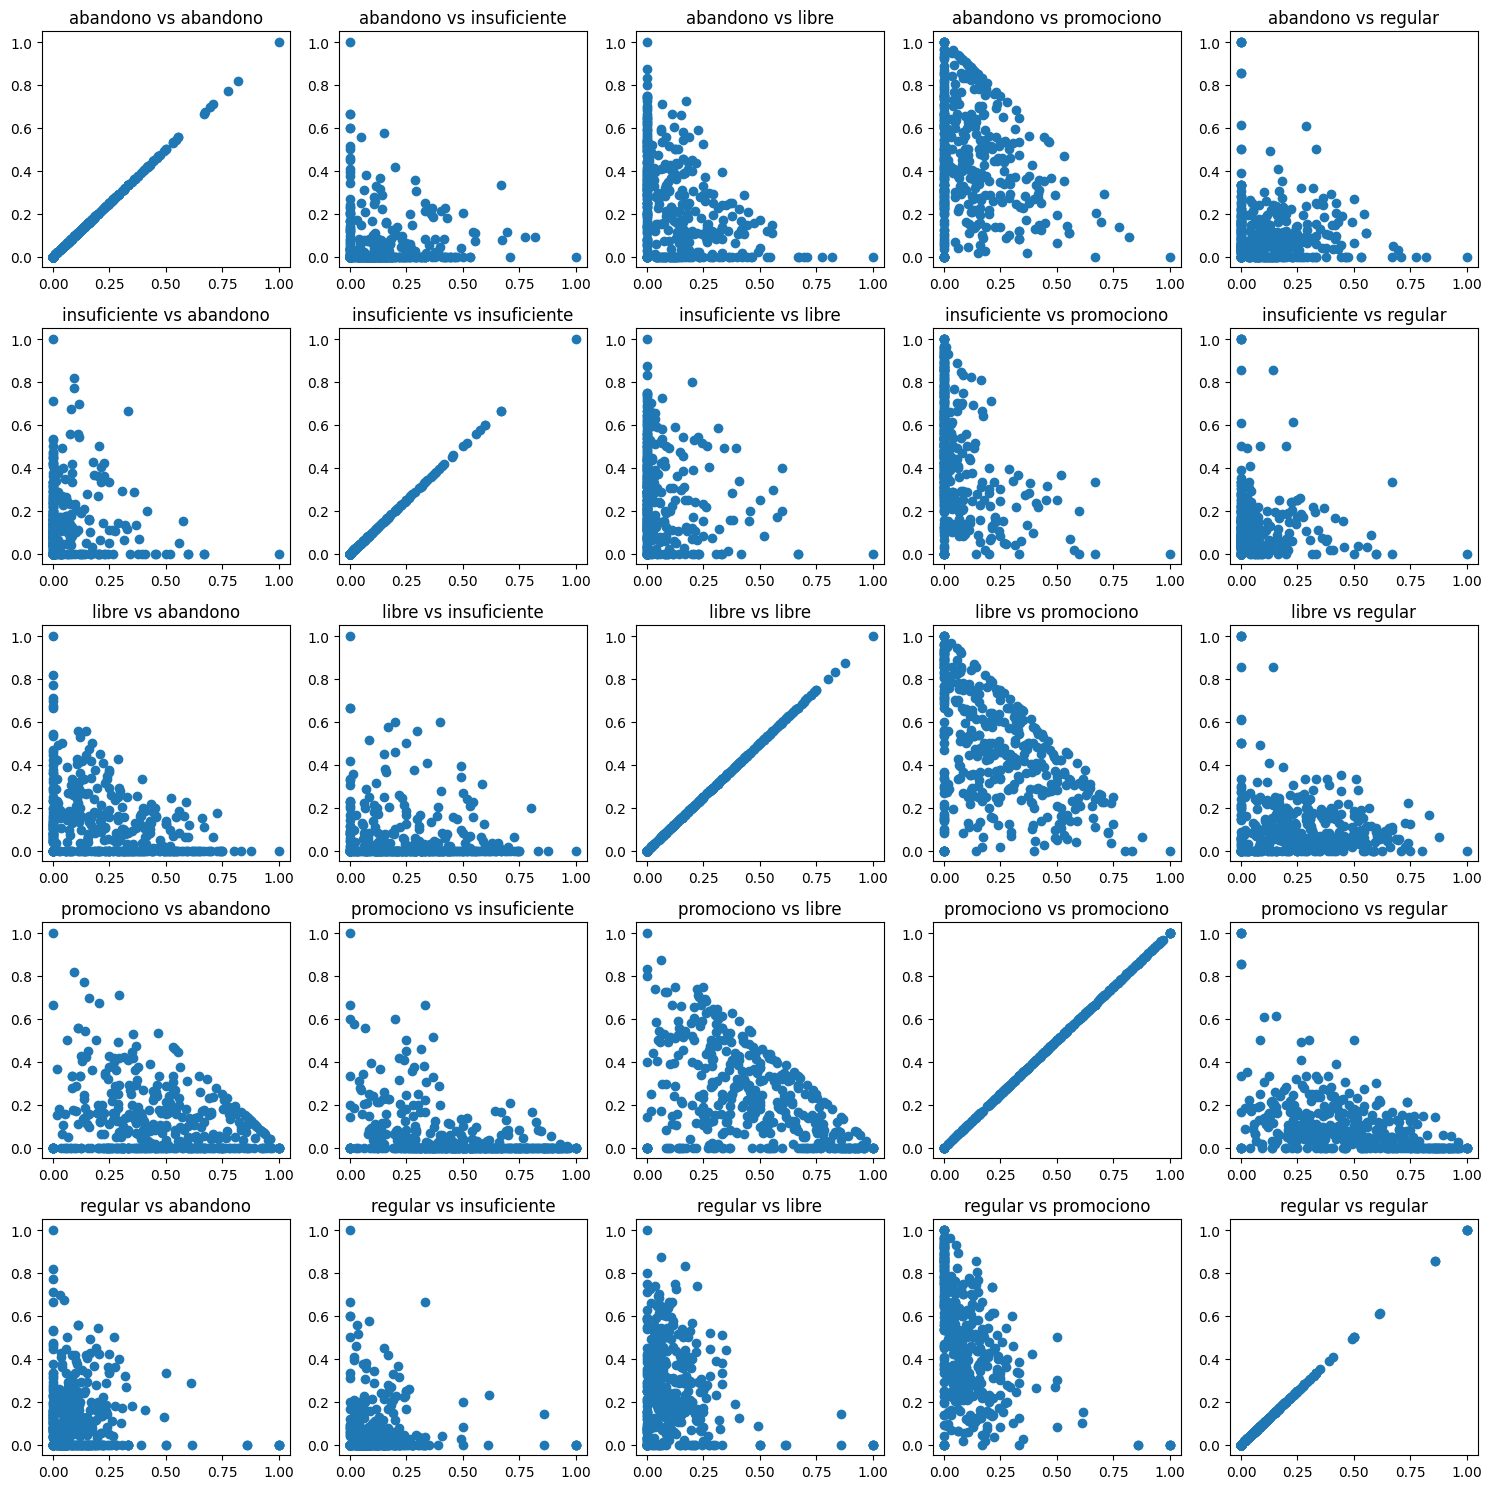

In [86]:
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        cols = stats_normalized.iloc[:, [i, j]].columns
        axs[i, j].scatter(stats_normalized.iloc[:, i], stats_normalized.iloc[:, j])
        axs[i, j].set_title(f'{cols[0]} vs {cols[1]}')
plt.tight_layout()
plt.show()

In [ ]:
# Estadísticas 'Agregadas': 
# Aprobados = promociono + regular
# Desaprobados = abandono + libre + insuficiente
stats_agg = pd.DataFrame()
stats_agg['total_alumnos'] = stats['total_alumnos']
stats_agg['aprobados'] = stats['promociono'] + stats['regular']
stats_agg['desaprobados'] = stats['abandono'] + stats['insuficiente'] + stats['libre']
stats_agg['aprobados_norm'] = stats_agg['aprobados']/stats_agg['total_alumnos']
stats_agg['desaprobados_norm'] = stats_agg['desaprobados']/stats_agg['total_alumnos']

In [73]:
print('Resumen de las estadísticas agregadas')
stats_agg.describe()

Resumen de las estadísticas agregadas


,total_alumnos,aprobados,desaprobados,aprobados_norm,desaprobados_norm
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,40.020408,22.066327,17.954082,0.570037,0.429963
std,25.271611,16.763610,15.692960,0.241095,0.241095
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,9.750000,5.000000,0.386264,0.235771
50%,36.000000,18.000000,14.000000,0.575569,0.424431
75%,57.000000,30.000000,27.000000,0.764229,0.613736
max,123.000000,106.000000,100.000000,1.000000,1.000000


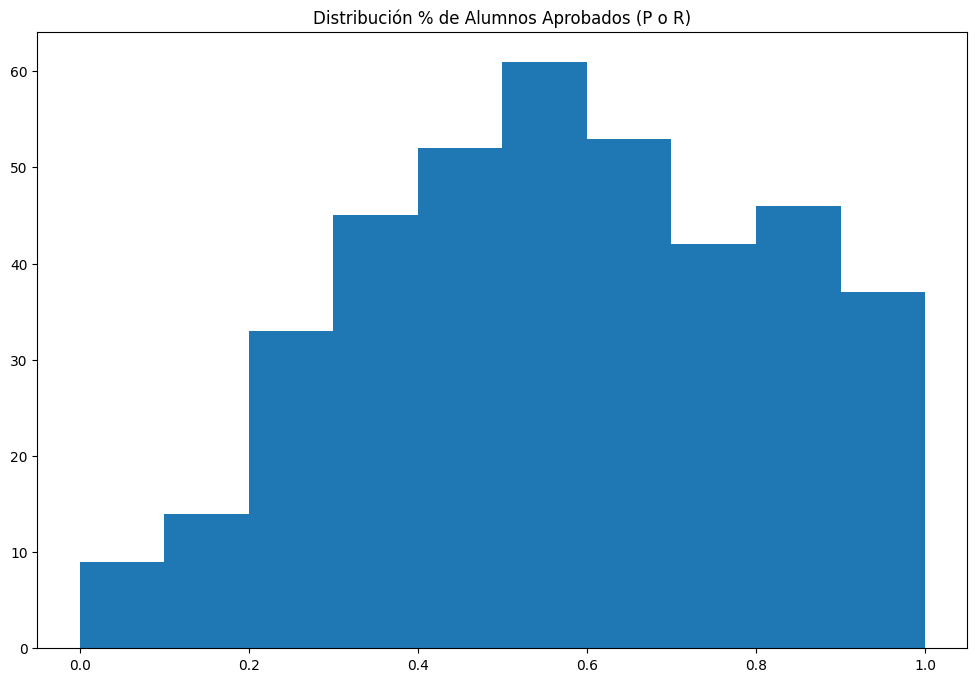

In [72]:
plt.figure(figsize=(12, 8))
plt.hist(data=stats_agg, x='aprobados_norm')
plt.title('Distribución % de Alumnos Aprobados (P o R)')
plt.show()

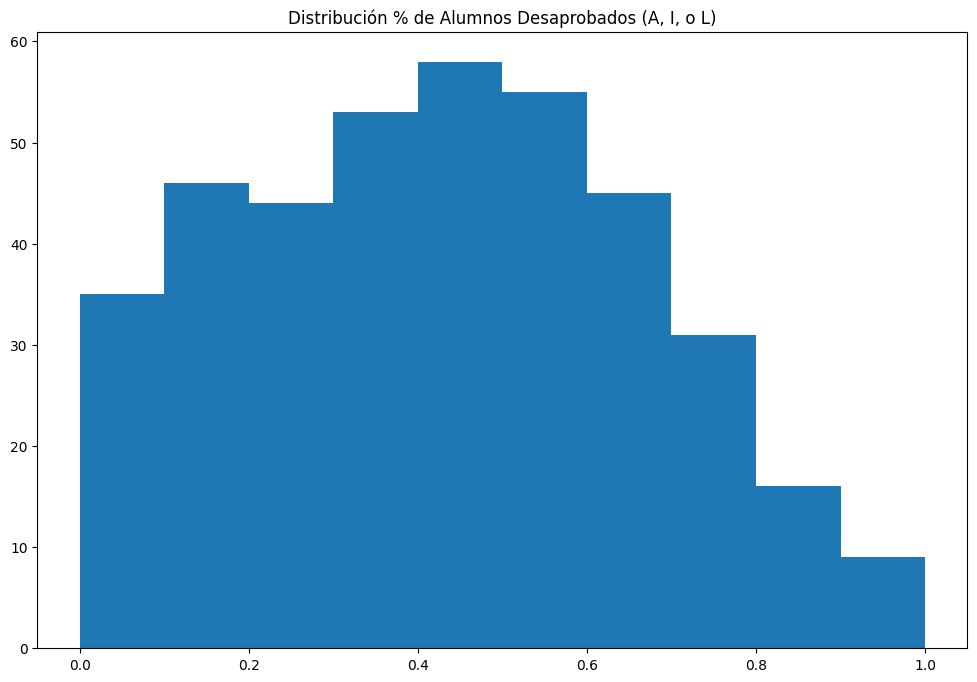

In [71]:
plt.figure(figsize=(12, 8))
plt.hist(data=stats_agg, x='desaprobados_norm')
plt.title('Distribución % de Alumnos Desaprobados (A, I, o L)')
plt.show()